<a href="https://colab.research.google.com/github/oguzhnsglm/PCOS-Prediction-and-Analysis/blob/main/PCOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing all the libraries that I use in this project
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#İnfertilite olan ve olmayan iki farklı veri seti olduğu için birleştiriliyor

file_path_with_infertility="PCOS_infertility.csv"
file_path_without_infertility="PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

df = pd.merge(PCOS_woinf, PCOS_inf, on='Patient File No.', suffixes=('', '_y'), how='left')
df.head()


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44,Sl. No_y,PCOS (Y/N)_y,I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y,AMH(ng/mL)_y
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,3,18.0,18.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,5,15.0,14.0,3.7,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,15,18.0,20.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,2,15.0,14.0,7.5,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,4,16.0,14.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df=df.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'],axis=1)

In [4]:
from sklearn import preprocessing

df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors='coerce')
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors='coerce')

#Null değerler yerine median yazıldı, mean yazmak yada silmek ?

df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].median(),inplace=True)
df['II    beta-HCG(mIU/mL)'].fillna(df['II    beta-HCG(mIU/mL)'].median(),inplace=True)
df['AMH(ng/mL)'].fillna(df['AMH(ng/mL)'].median(),inplace=True)
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].median(),inplace=True)


In [5]:
df.columns = [col.strip() for col in df.columns]
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


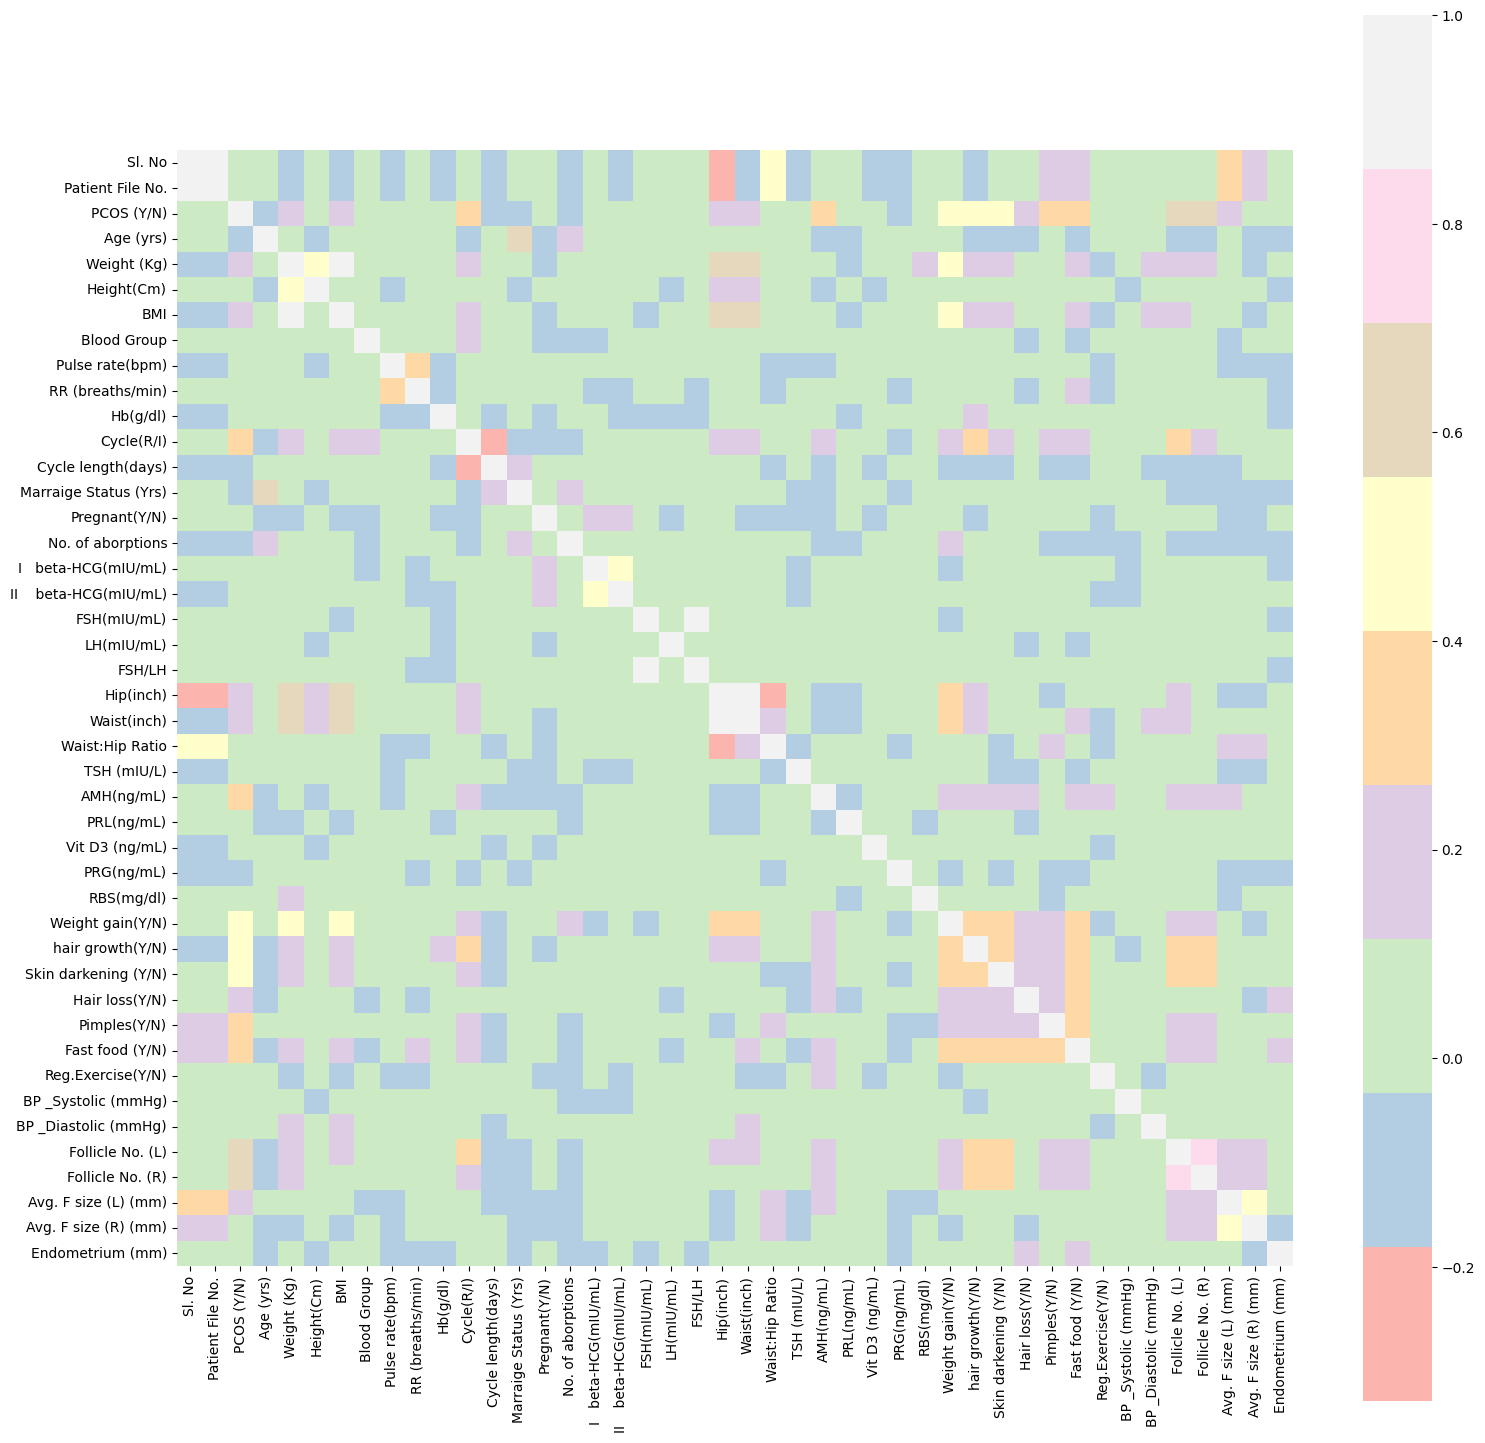

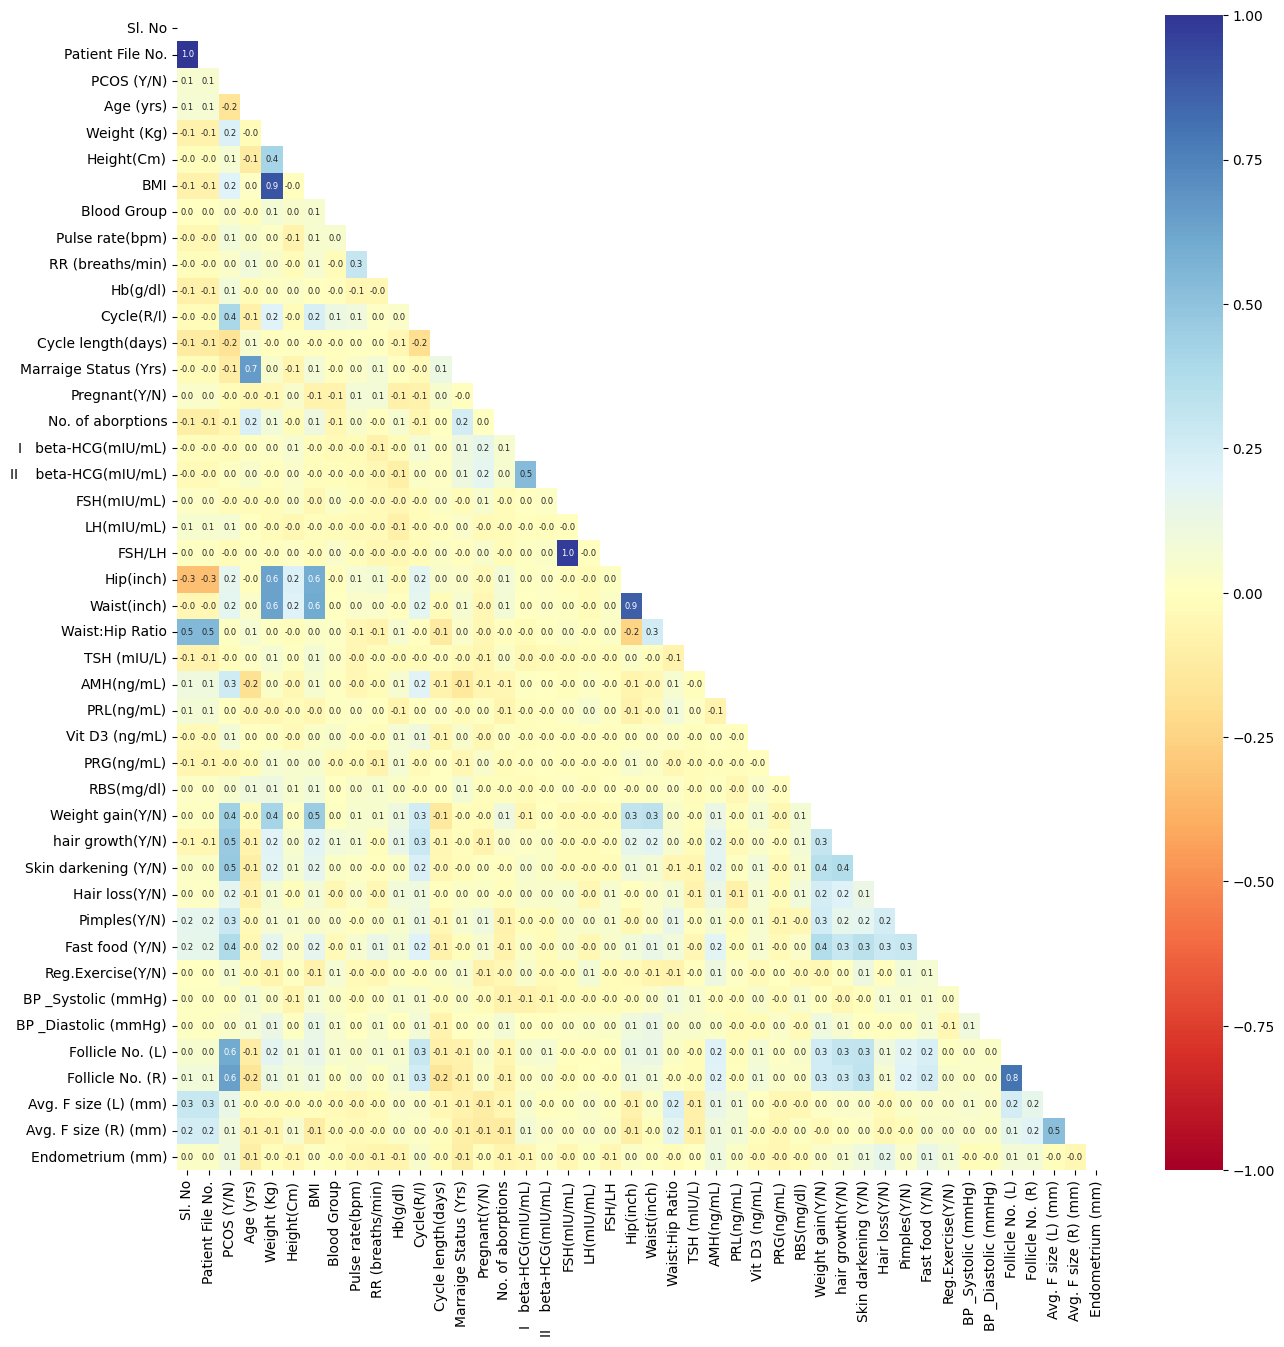

In [6]:
#3 farklı heatmap, 3.sü çok zaman aldığı için yorum haline getirildi

corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True,fmt='.2f', annot_kws={'size': 10});

#2.si
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='RdYlBu', annot=True, mask=mask,fmt='.1f', annot_kws={'size': 6})
plt.show()

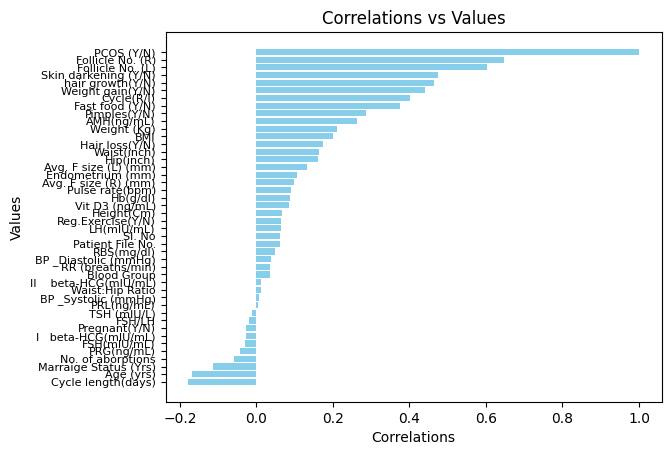

In [7]:
#Korelasyon bar grafik
c_bar=corrmat["PCOS (Y/N)"].sort_values(ascending=True)

plt.xlabel("Correlations")
plt.ylabel("Values")
plt.title("Correlations vs Values")
plt.yticks( size='8')
plt.grid(False)

plt.barh(*zip(*c_bar.items()),color='skyblue')

plt.show()


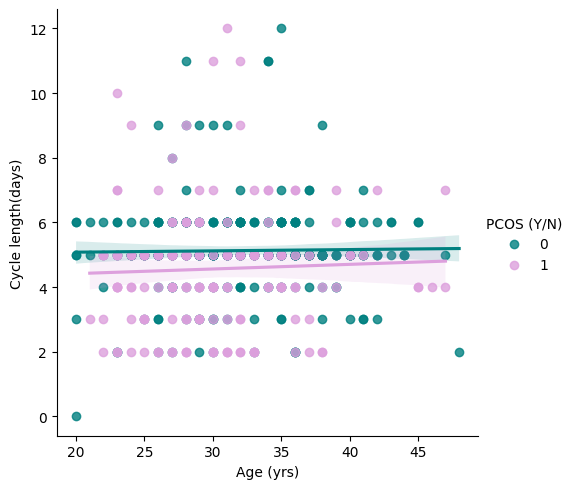

In [8]:
color = ["teal", "plum"]
fig=sns.lmplot(data=df,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

In [9]:
# X ve y
from sklearn import preprocessing
X=df.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis=1)
y=df["PCOS (Y/N)"]

scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)

In [19]:
# İlk uygulama RF ile çalıştırıldı
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


Rs = {"RandomForestClassifier()":0,"DecisionTreeClassifier()":0,"AdaBoostClassifier()":0,"ExtraTreesClassifier()":0,"XGBClassifier()":0}

for k,v in Rs.items():
    classifier= eval(k)
    classifier.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.
    pred_rfc = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred_rfc)
    Rs[k] = accuracy

print("En iyi sınıflandırıcı:{}, skor={}".format(max(Rs, key=Rs.get), max(Rs.values())))

#M Metrikler ve confusion matrix için predictionsları elde etme

classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

predictions=classifier.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


classi_report = classification_report(y_test, predictions)
print(classi_report)

En iyi sınıflandırıcı:RandomForestClassifier(), skor=0.908256880733945
0.908256880733945
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        70
           1       0.94      0.79      0.86        39

    accuracy                           0.91       109
   macro avg       0.92      0.88      0.90       109
weighted avg       0.91      0.91      0.91       109



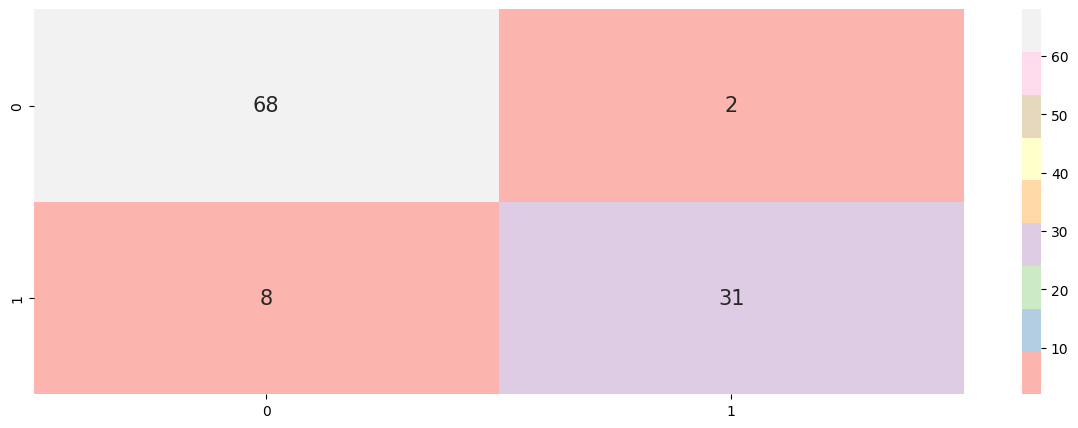

                   0          1  accuracy   macro avg  weighted avg
precision   0.894737   0.939394  0.908257    0.917065      0.910715
recall      0.971429   0.794872  0.908257    0.883150      0.908257
f1-score    0.931507   0.861111  0.908257    0.896309      0.906319
support    70.000000  39.000000  0.908257  109.000000    109.000000
[[68  2]
 [ 8 31]]


In [20]:

# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')
plt.show()
plt.close()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_report = pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

print(rf_report)
print(cf_matrix)


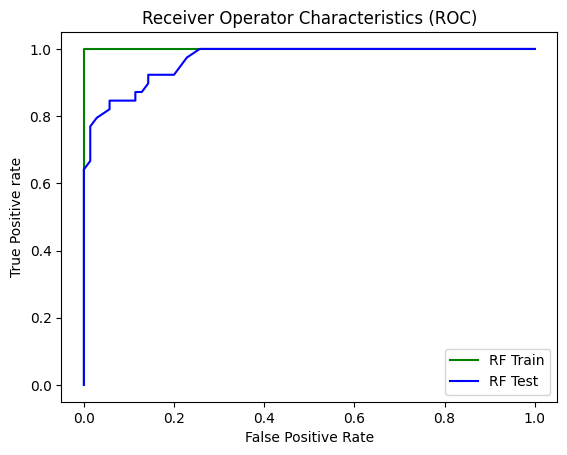

In [22]:
#ROC AUC
# ROC Curves

from sklearn.metrics import roc_curve

tpr_tr, fpr_tr, thresh_rf = roc_curve(y_train, classifier.predict_proba(X_train)[:, 1], pos_label = 1)
tpr_test, fpr_test, thresh_rf = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1], pos_label = 1)

plt.plot(tpr_tr, fpr_tr, linestyle = "solid", color = "green", label = "RF Train")
plt.plot(tpr_test, fpr_test, linestyle = "solid", color = "blue", label = "RF Test")


plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()
plt.close()

In [24]:
#AUC
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, classifier.predict(X_test))
print("AUC",auc)

AUC 0.883150183150183


In [28]:

#GridSearch CV

parameters = {
    'n_estimators': [100,150, 200,500,700],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

In [29]:
# GridSearch ile Hyperperemeter kısmı

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=classifier, param_grid=parameters, cv= 7)
CV_rfc.fit(X_train, y_train)

0.8715596330275229

In [32]:
#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 100, 'n_jobs': 1}

In [33]:
#Testing the Model on test set

predictions=CV_rfc.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.9174311926605505